Stephanie Chiang  
DATA 620 Summer 2025  
### Assignment Week 2 Part 1:
# Graph Visualization


This will be an analysis and visualization of Congressional Twitter interactions. The dataset was pulled from Stanford's SNAP website, and I will be using the Python library NetworkX to load and visualize the graph.

There are more details on the original [dataset here](https://snap.stanford.edu/data/congress-twitter.html): "This network represents the Twitter interaction network for the 117th United States Congress, both House of Representatives and Senate. The base data was collected via the Twitter’s API, then the empirical transmission probabilities were quantified according to the fraction of times one member retweeted, quote tweeted, replied to, or mentioned another member’s tweet."

## Importing the Dataset

The download includes an `.edgelist` text file with each line representing a single edge or relationship. There are 475 nodes and 10222 edges in total. The nodes start off as integers, or anonymized IDs for each Twitter handle. Per the README file, the actual Twitter usernames are listed in the included JSON file, given as a list of names that correspond to their index numbers. So to make the resulting graph more readable, I will extract the actual name of each account from the JSON and map to the nodes in the network edgelist.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Helper function to read from a JSON file
def read_json_value(file_path):
    import json
    with open(file_path, 'r') as file:
        data = json.load(file)
    return data[0]

# Extract the usernameList from the JSON
cnd = read_json_value("congress_network_data.json")
usernameList = cnd["usernameList"]
# print(usernameList[:10])

# Read the edgelist file and create a NetworkX graph
G = nx.read_edgelist("congress.edgelist", create_using = nx.Graph())

# Print graph info to confirm
print(G)
print("First 10 nodes by ID:", list(G.nodes())[:10])

# Replace anonymized int node labels with the Twitter handles from usernameList corresponding to each node i
for i in range(len(usernameList)):
    if usernameList[i] is not None:
        G = nx.relabel_nodes(G, {str(i): usernameList[i]})

# Print updated graph info
print("First 10 nodes by username:", list(G.nodes())[:10])

Graph with 475 nodes and 10222 edges
First 10 nodes by ID: ['0', '4', '12', '18', '25', '30', '46', '55', '58', '59']
First 10 nodes by username: ['SenatorBaldwin', 'SenBlumenthal', 'SenatorCardin', 'SenCortezMasto', 'SenatorDurbin', 'LindseyGrahamSC', 'SenAmyKlobuchar', 'SenJeffMerkley', 'ChrisMurphyCT', 'PattyMurray']


## EDA & Graph Analysis

Using some of NetworkX's built-in functions, I will calculate the following metrics:
- Diameter: the longest shortest path between any two nodes, or the greatest distance between any two vertices in the graph
- Density: the ratio of how many connections exist in the network vs all the possible connections
- Centrality: the importance of a node in the network or how central it is, based on its connections to other nodes

In [ ]:
# Diameter of the graph
diameter = nx.diameter(G)
print(f"Diameter of the graph: {diameter}")

# Density of the graph
density = nx.density(G)
print(f"Density of the graph: {density}")

# Calculate the centrality of each node
degree_centrality = nx.degree_centrality(G)

# Convert dict to tuples, sort on the degree value in desc order, slice top 10
top_degree_centrality = sorted(degree_centrality.items(), key = lambda x: x[1], reverse = True)[:10]

# Print the top 10 nodes and degree centrality
for node, centrality in top_degree_centrality:
    print(f"{node}: {centrality}")

Diameter of the graph: 4
Density of the graph: 0.09080168776371308
SpeakerPelosi: 0.45147679324894513
GOPLeader: 0.38185654008438813
LeaderHoyer: 0.2995780590717299
RepFranklin: 0.28270042194092826
RepBobbyRush: 0.27215189873417717
RepJeffDuncan: 0.2679324894514768
RepDonBeyer: 0.2531645569620253
RepTomEmmer: 0.23839662447257381
RepMikeJohnson: 0.2362869198312236
RepJohnRose: 0.2341772151898734


The diameter of 4 means that the farthest apart that 2 nodes can get from each other in this network is 4 edges, or 4 degrees of Twitter separation. The network seems relatively well-connected, as most nodes can be reached in just a few steps.  

The density of 0.09 means that the network is still fairly sparse, with only 9% of the possible connections made.  

Finally, as could be expected, the top 2 most central nodes are the Speaker of the House Nancy Pelosi and the GOPLeader account, both very powerful members of Congress. Their degree values were much higher from than the rest.

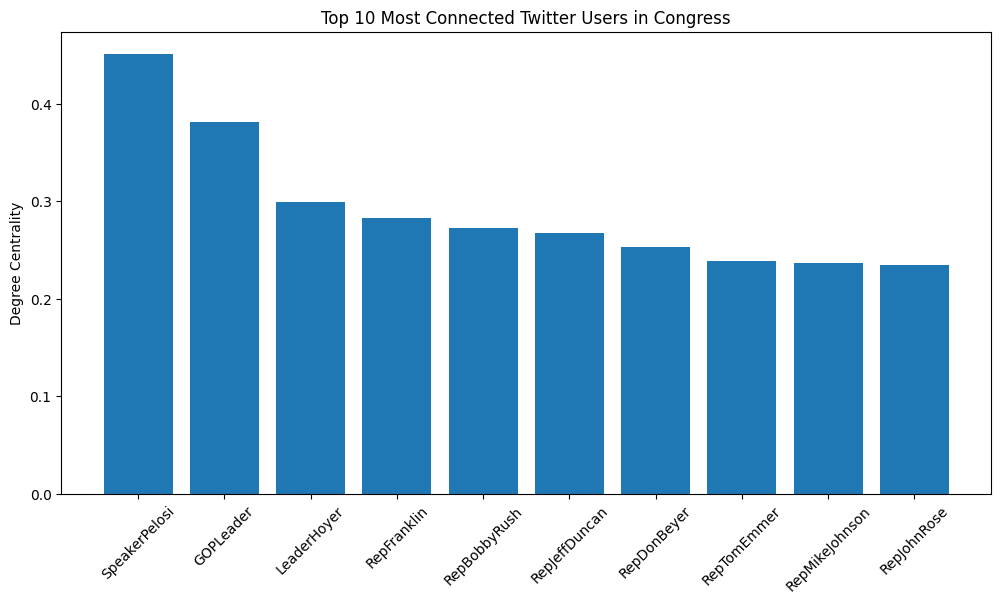

In [37]:
plt.figure(figsize=(12, 6))
plt.bar([node for node, _ in top_degree_centrality], [centrality for _, centrality in top_degree_centrality])
plt.title("Top 10 Most Connected Twitter Users in Congress")
plt.xlabel("")
plt.ylabel("Degree Centrality")
plt.xticks(rotation=45)
plt.show()


## Visualizing the Network

Now using NetworkX in combination with Matplotlib, the network graph of these Top 10 nodes can be plotted.

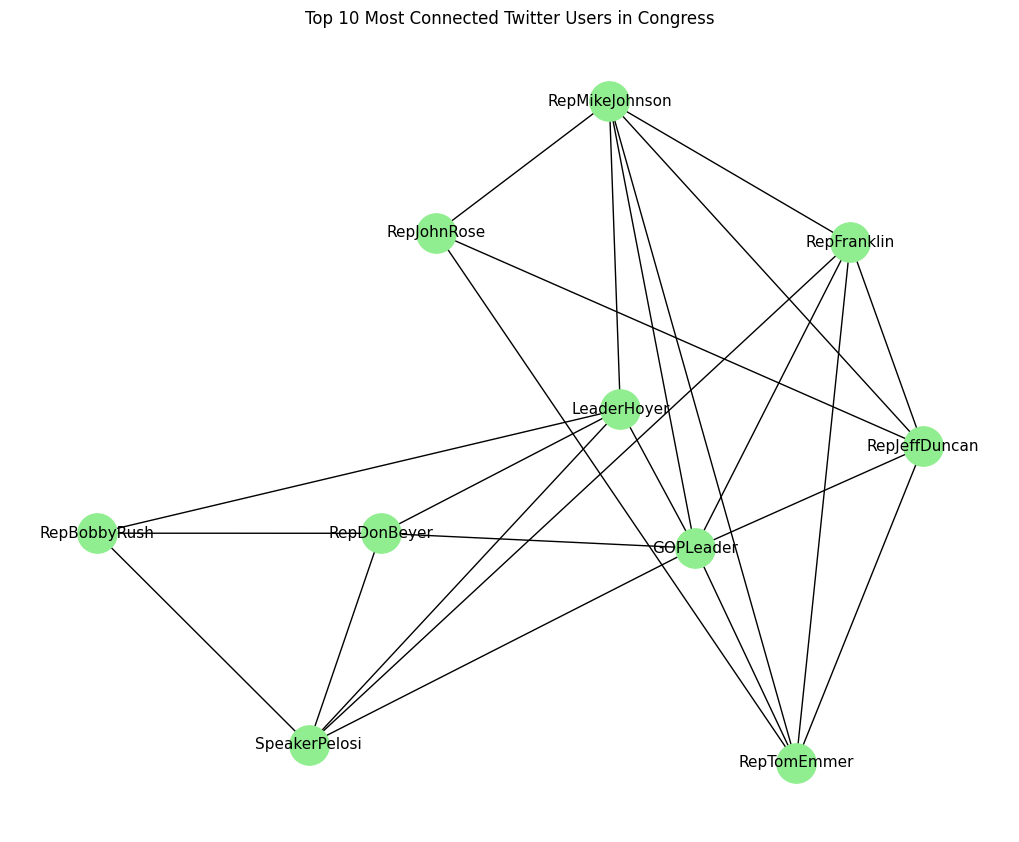

In [49]:
# Create a subgraph with the top 10 nodes, drop centrality values
top_nodes = [node for node, _ in top_degree_centrality]
G_top = G.subgraph(top_nodes)

plt.figure(figsize=(10, 8))
nx.draw(
    G_top,
    with_labels = True,
    node_size = 800,
    font_size = 11,
    node_color = 'lightgreen')
plt.title("Top 10 Most Connected Twitter Users in Congress")
plt.show()